In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords as sw
from sklearn.feature_extraction.text import TfidfVectorizer

import re

%matplotlib inline

/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
stopwords = set(sw.words('english'))

In [3]:
def lemmatize(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemma_list = []
    for token in tokens:
        lemma = lemmatizer.lemmatize(token, 'v')
        if lemma == token:
            lemma = lemmatizer.lemmatize(token)
        lemma_list.append(lemma)
    # return [ lemmatizer.lemmatize(token, 'v') for token in tokens ]
    return lemma_list

def process_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', ' <url> ', text)
    text = re.sub(r'#+', ' <hashtag> ', text )
    text = re.sub(r'@[A-Za-z0-9]+', ' <user> ', text)
    text = re.sub(r"([A-Za-z]+)'s", r"\1 is", text)

    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"don't", "do not ", text)
    text = re.sub(r"did't", "did not ", text)
    text = re.sub(r"shouldn't", "should not ", text)
    text = re.sub(r"wouldn't", "would not ", text)
    text = re.sub(r"hadn't", "had not ", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"won't", "will not ", text)
    text = re.sub(r"isn't", "is not ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)

    text = re.sub(r"dont", " do not", text)
    text = re.sub(r"didnt", " did not", text)
    text = re.sub(r"wont", " will not", text)
    text = re.sub(r"cant", " can not", text)

    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d+', ' <number> ', text)
    text = re.sub('\s+url\s+', ' <url> ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

def remove_stopwords(stopwords, text):
    res = []
    for token in tokens:
        if not token in stopwords:
            res.append(token)
    return ' '.join(text)

In [4]:
data = pd.read_json('data/nepali-movies.json')

In [5]:
data.head()

,genre,imdb_url,plot,rating,runtime,title,votes,year
0,"Comedy, Drama",https://www.imdb.com/title/tt7229666/,Chhakka Panja 2 continues with new story of Ra...,6.6,138 min,Chhakka Panja 2,290.0,2017
1,Comedy,https://www.imdb.com/title/tt8393764/,When she learns about the worst condition of t...,6.3,None,Chhakka Panja 3,96.0,2018
2,Romance,https://www.imdb.com/title/tt7672868/,When Ishan (Dhiraj Magar) and Meera (Samragyee...,7.3,120 min,Intu Mintu Londonma,71.0,2018
3,"Comedy, Drama, Romance",https://www.imdb.com/title/tt10942220/,Add a Plot,8.6,None,Kabaddi Kabaddi Kabaddi,9.0,2019
4,"Drama, Sport",https://www.imdb.com/title/tt8387542/,Father's dedication to guiding his son to beco...,3.2,None,Captain,46.0,2019


In [6]:
data['plot_clean'] = data['plot'].apply(process_text)

In [7]:
data.head()

,genre,imdb_url,plot,rating,runtime,title,votes,year,plot_clean
0,"Comedy, Drama",https://www.imdb.com/title/tt7229666/,Chhakka Panja 2 continues with new story of Ra...,6.6,138 min,Chhakka Panja 2,290.0,2017,chhakka panja <number> continues with new stor...
1,Comedy,https://www.imdb.com/title/tt8393764/,When she learns about the worst condition of t...,6.3,None,Chhakka Panja 3,96.0,2018,when she learns about the worst condition of t...
2,Romance,https://www.imdb.com/title/tt7672868/,When Ishan (Dhiraj Magar) and Meera (Samragyee...,7.3,120 min,Intu Mintu Londonma,71.0,2018,when ishan dhiraj magar and meera samragyee ra...
3,"Comedy, Drama, Romance",https://www.imdb.com/title/tt10942220/,Add a Plot,8.6,None,Kabaddi Kabaddi Kabaddi,9.0,2019,add a plot
4,"Drama, Sport",https://www.imdb.com/title/tt8387542/,Father's dedication to guiding his son to beco...,3.2,None,Captain,46.0,2019,father is dedication to guiding his son to bec...


In [8]:
df = data[pd.notnull(data['rating'])]
df = df[df['plot'] != 'Add a Plot']

In [9]:
df.head()

,genre,imdb_url,plot,rating,runtime,title,votes,year,plot_clean
0,"Comedy, Drama",https://www.imdb.com/title/tt7229666/,Chhakka Panja 2 continues with new story of Ra...,6.6,138 min,Chhakka Panja 2,290.0,2017,chhakka panja <number> continues with new stor...
1,Comedy,https://www.imdb.com/title/tt8393764/,When she learns about the worst condition of t...,6.3,None,Chhakka Panja 3,96.0,2018,when she learns about the worst condition of t...
2,Romance,https://www.imdb.com/title/tt7672868/,When Ishan (Dhiraj Magar) and Meera (Samragyee...,7.3,120 min,Intu Mintu Londonma,71.0,2018,when ishan dhiraj magar and meera samragyee ra...
4,"Drama, Sport",https://www.imdb.com/title/tt8387542/,Father's dedication to guiding his son to beco...,3.2,None,Captain,46.0,2019,father is dedication to guiding his son to bec...
5,Drama,https://www.imdb.com/title/tt8622286/,A young mother waiting for her husband to be b...,7.1,95 min,Bulbul,18.0,2019,a young mother waiting for her husband to be b...


In [10]:
df.shape

(207, 9)

In [11]:
df['rating'].value_counts()

7.5     12
8.2     11
7.7     11
6.8      8
6.6      8
8.4      8
7.2      8
8.0      7
7.9      7
7.4      7
7.3      7
7.6      6
8.8      6
8.5      6
7.1      6
8.6      6
6.5      6
6.9      6
8.1      6
7.8      5
8.3      5
7.0      5
6.7      4
6.2      4
8.7      4
9.0      3
8.9      3
6.0      3
5.6      3
6.4      3
9.1      3
9.5      2
5.7      2
5.9      2
6.3      2
6.1      1
5.3      1
5.5      1
5.1      1
3.2      1
5.0      1
10.0     1
9.3      1
3.8      1
4.9      1
9.2      1
5.2      1
Name: rating, dtype: int64

In [12]:
#df3 = pd.DataFrame({'value': np.random.randint(1, 80, 20)}) 
df3 = pd.DataFrame({'value' : np.arange(1, 11)})
df3['rating_categorical'] = pd.cut(df3.value,
                     bins=[0, 3, 6, 8, 10],
                     labels=["A", "B", "C", "D",])
df3

,value,rating_categorical
0,1,A
1,2,A
2,3,A
3,4,B
4,5,B
5,6,B
6,7,C
7,8,C
8,9,D
9,10,D


In [13]:
df['rating_categorical'] = pd.cut(df.rating,
                     bins=[0, 3, 6, 8, 10],
                     labels=["0", "1", "2", "3",])

In [14]:
df.head()

,genre,imdb_url,plot,rating,runtime,title,votes,year,plot_clean,rating_categorical
0,"Comedy, Drama",https://www.imdb.com/title/tt7229666/,Chhakka Panja 2 continues with new story of Ra...,6.6,138 min,Chhakka Panja 2,290.0,2017,chhakka panja <number> continues with new stor...,2
1,Comedy,https://www.imdb.com/title/tt8393764/,When she learns about the worst condition of t...,6.3,None,Chhakka Panja 3,96.0,2018,when she learns about the worst condition of t...,2
2,Romance,https://www.imdb.com/title/tt7672868/,When Ishan (Dhiraj Magar) and Meera (Samragyee...,7.3,120 min,Intu Mintu Londonma,71.0,2018,when ishan dhiraj magar and meera samragyee ra...,2
4,"Drama, Sport",https://www.imdb.com/title/tt8387542/,Father's dedication to guiding his son to beco...,3.2,None,Captain,46.0,2019,father is dedication to guiding his son to bec...,1
5,Drama,https://www.imdb.com/title/tt8622286/,A young mother waiting for her husband to be b...,7.1,95 min,Bulbul,18.0,2019,a young mother waiting for her husband to be b...,2


In [15]:
vectorizer = TfidfVectorizer(stop_words='english')

In [16]:
X = vectorizer.fit_transform(df['plot_clean']).toarray()

In [17]:
X.shape

(207, 2029)

In [18]:
df['rating_categorical'].value_counts()

2    123
3     66
1     18
0      0
Name: rating_categorical, dtype: int64

# Plot Visualization

In [19]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE

In [44]:
#projector = PCA(n_components=2)
projector = TruncatedSVD(n_components=2)
# projector = TSNE(n_components=2)

In [45]:
X2d = projector.fit_transform(X)

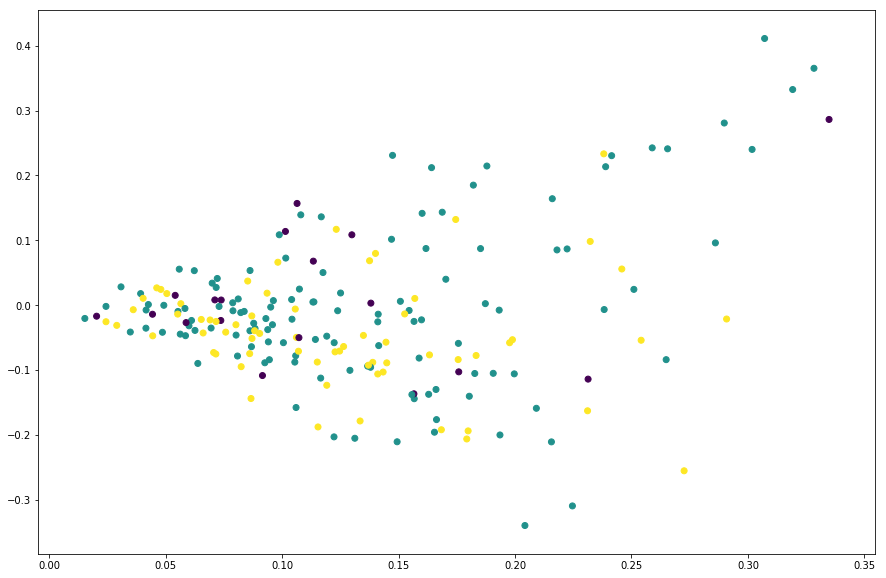

In [46]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.scatter(X2d[:, 0], X2d[:, 1], c=df['rating_categorical'].values)

# Clustering
We cluster plot based on the TF-IDF features extracted from the text.

In [47]:
from sklearn.cluster import KMeans

In [48]:
model = KMeans(n_clusters=3)

In [49]:
predictions = model.fit_predict(X)

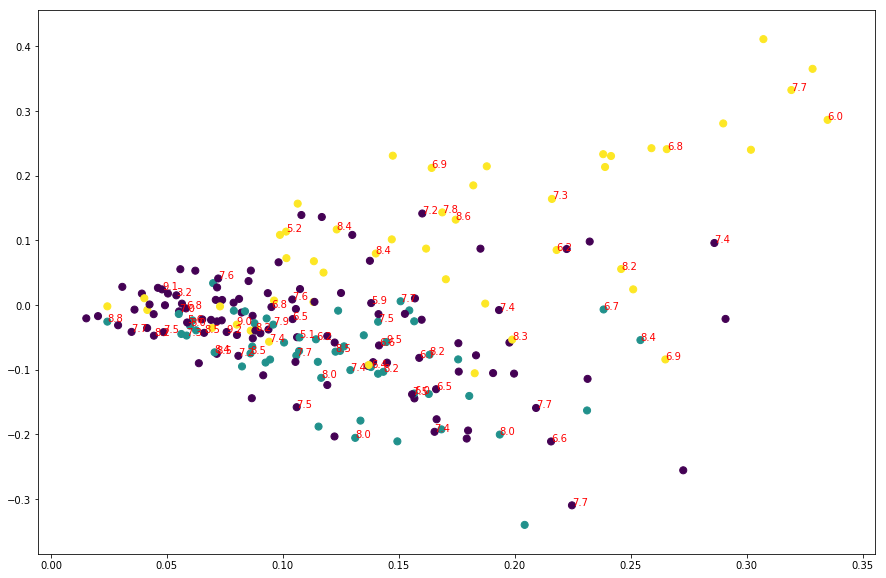

In [50]:
plt.rcParams['figure.figsize'] = (15, 10)
fig, ax = plt.subplots()
ax.scatter(X2d[:, 0], X2d[:, 1], c=predictions, s=50)
for i, txt in enumerate(df['plot'].values):
    #ax.annotate(txt, (X[i],Y[i], Z[i]))
    if i%3 == 0:
        ax.text(X2d[i, 0], X2d[i, 1], "{}".format(df['rating'].iloc[i]), color='red')

#plt.scatter(X2d[:, 0], X2d[:, 1], c=predictions)

In [51]:
#projector = PCA(n_components=1)
projector = TruncatedSVD(n_components=1)
#projector = TSNE(n_components=2)

In [52]:
X1d = projector.fit_transform(X)

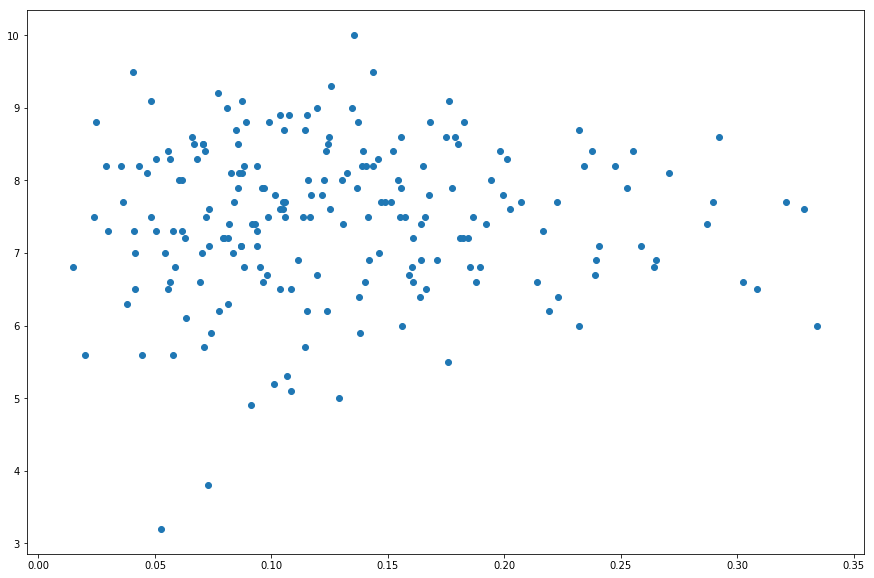

In [53]:
plt.scatter(X1d, df['rating'].values)

# Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [55]:
model = LinearRegression()

In [56]:
model.fit(X1d, df['rating'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
model.coef_, model.intercept_

(array([0.29568383]), 7.440025515377086)

In [58]:
print(mean_squared_error(X1d, model.predict(df['rating'].values.reshape(-1, 1))))
print(mean_absolute_error(X1d, model.predict(df['rating'].values.reshape(-1, 1))))

90.76556990575838
9.5219147202958


In [59]:
# Xreg = np.arange(0, 10)
# Yreg = model.coef_[0] * Xreg + model.intercept_
# plt.scatter(X1d, df['rating'].values)
# plt.plot(Xreg, Yreg, color='red')
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
#df['rating'].values.reshape(-1, 1)

/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


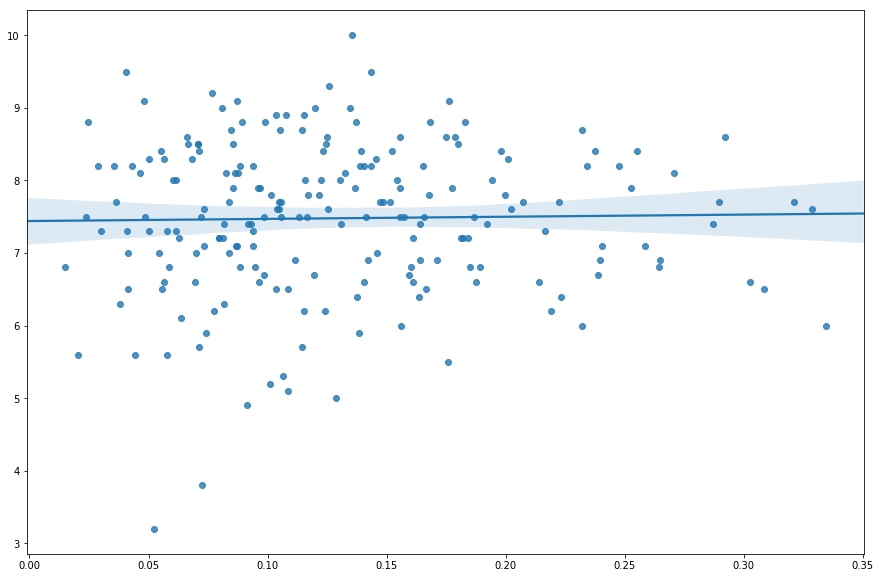

In [61]:
sns.regplot(X1d, df['rating'].values)